In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

C:\Users\diegofilipe\Miniconda3\envs\tensorflowgpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Em um problema real de Redes Neurais, normalmente uma instância pode possuir inúmeras entradas, resultando em uma arquitetura de rede extensa com muitos neurônios e de múltiplas camadas. 

Um exemplo comum de aplicação nesse escopo é um classificador de imagens, em que cada entrada representa um neurônio da camada de entrada. Sabendo disso, esse notebook tem como objetivo implementar uma Rede Neural Multicamada (MLP) para o dataset MNIST. O MNIST é um dataset de dígitos escritos a mão, conforme Figura 1. 

A MLP deve ser implementada de forma a utilizar uma arquitetura simples e ainda, assim, obter uma performance elevada. Ao final, três modelos de rede devem ser implementados e comparados. Os detalhes de implementação devem ser justificados a cada questão e será dividido em 5 etapas:
* Leitura, visualização e Préprocessamento do dataset
* Conversão do array de predições Y
* Definição da topologia da rede (camadas e neurônios)
* Definir otimizador, função custo e modo do treinamento (batch, mini-batch, estocástico)
* Treinamento e avaliação de resultados

![alt text](imgs/mninst.png "Title")

# Leitura, visualização e pré-processamento do dataset

Ao utilizar Redes Neurais para imagens, cada entrada é um pixel. Dessa forma, após a leitura do dataset, precisa-se descobrir as dimensões da imagem, a quantidade de instâncias, quantas classes e entradas são necessárias para o problema.

Feito isso, algumas técnicas de pré-processamento devem ser utilizadas para melhores resultados, dentre eles converter a imagem para tons de cinza e normalizar.

Sabendo disso, retorne na célula abaixo essas informações e gere uma versão normalizada do dataset 


11493376/11490434 [==============================] - 16s 1us/step
 Exemplos de treinamento: (60000, 28, 28)
 Labels de treinamento: (60000,)
 Exemplos de teste: (10000, 28, 28)
 Labels de teste: (10000,)

60000 Amostras de treinameto
10000 Amostras de teste


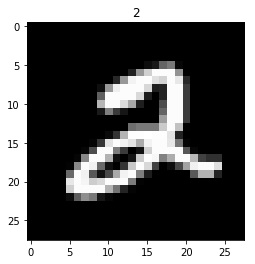

In [2]:
### leitura do dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
### Visualizar instâncias
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])
### Print - informações das instâncias
print(" Exemplos de treinamento: " + str(x_train.shape) + "\n", 
      "Labels de treinamento: " + str(y_train.shape) + "\n", 
      "Exemplos de teste: " + str(x_test.shape) + "\n", 
      "Labels de teste: " + str(y_test.shape) + "\n")
### Normalizar
x_train = x_train.reshape(-1,784).astype('float32') / 255.0
x_test =  x_test.reshape(-1,784).astype('float32') / 255.0
print(x_train.shape[0], 'Amostras de treinameto')
print(x_test.shape[0], 'Amostras de teste')

# Conversão do array de predições Y

Baseado no número de classes do problema, represente a saída como one-hot encoding. Indique a importância dessa representação.

In [3]:
num_classes = 10

def one_hot(true_labels,num_classes):
    """
    Função que implementa o one-hot encoding
    Entrada: true_labels - array original com os labels
    Retorna: labels - conversão one-hot          
    """
    labels = keras.utils.to_categorical(true_labels, num_classes)
    return labels

y_train_oh = one_hot(y_train, num_classes)
y_test_oh = one_hot(y_test, num_classes)
print(y_train_oh.shape)
print(y_test_oh.shape)
print(y_test_oh[1])
#print(x_train[5])
#print(y_train_oh[5])

(60000, 10)
(10000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Definição de Topologia da Rede

Mostre as três arquiteturas que serão utilizadas para resolver o problema. As arquiteturas devem ser simples de forma a retornar bons resultados com a menor quantidade necessária de neurônios e camadas. As três arquiteturas devem variar apenas quanto ao número de neurônios e camadas (incluindo regularização). Baseado nisso, explique:
* Quantos neurônios serão utilizados em cada camada?
* Quantas camadas serão utilizadas?
* É necessário utilizar regularização? Se sim explique a técnica que foi utilizada e o impacto nos resultados
* Qual função de ativação será utilizada? Escolha duas funções de ativação e explique os resultados obtidos

# Definir otimizador, função custo e modo do treinamento

Uma Rede Neural é um problema de otimização, sabendo disso, explique:
* Qual otimizador será utilizado? Escolha dois otimizadores, explique a diferença entre eles justificando a escolha e comente os resultados obtidos.
* Será necessário utilizar uma função custo? Explique o que é uma função custo e qual será utilizada justificando a escolha.
* Qual modo de treinamento foi utilizado? Justifique sua resposta
* Quantas épocas serão necessárias? Caso os métodos por batch ou mini-batch sejam escolhidos, indique também o tamanho



# Treinamento e avaliação dos resultados

Treine as três redes e mostre os resultados de cada uma a partir das questões anteriores.


## Arquitetura 1

* Número de neuronios: 
* Número de camadas:
* Utilização de regularização:
* Número de épocas:
* Utilização de batch ou mini-batch:

In [26]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(784,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

score = model.evaluate(x_test, y_test_oh, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 17s 291us/step - loss: 0.5969 - acc: 0.8505 - val_loss: 0.2963 - val_acc: 0.9207
Epoch 2/30
60000/60000 [==============================] - 17s 288us/step - loss: 0.2761 - acc: 0.9234 - val_loss: 0.2534 - val_acc: 0.9304
Epoch 3/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.2371 - acc: 0.9328 - val_loss: 0.2346 - val_acc: 0.9343
Epoch 4/30
60000/60000 [==============================] - 17s 285us/step - loss: 0.2174 - acc: 0.9377 - val_loss: 0.2171 - val_acc: 0.9368
Epoch 5/30
60000/60000 [==============================] - 17s 288us/step - loss: 0.2050 - acc: 0.9412 - val_loss: 0.2185 - val_acc: 0.9375
Epoch 6/30
60000/60000 [==============================] - 18s 292us/step - loss: 0.1954 - acc: 0.9440 - val_loss: 0.2070 - val_acc: 0.9397
Epoch 7/30
60000/60000 [==============================] - 18s 296us/step - loss: 0.1874 - acc: 0.9454 - val_loss: 0.

Text(0.5,0,'epoch')

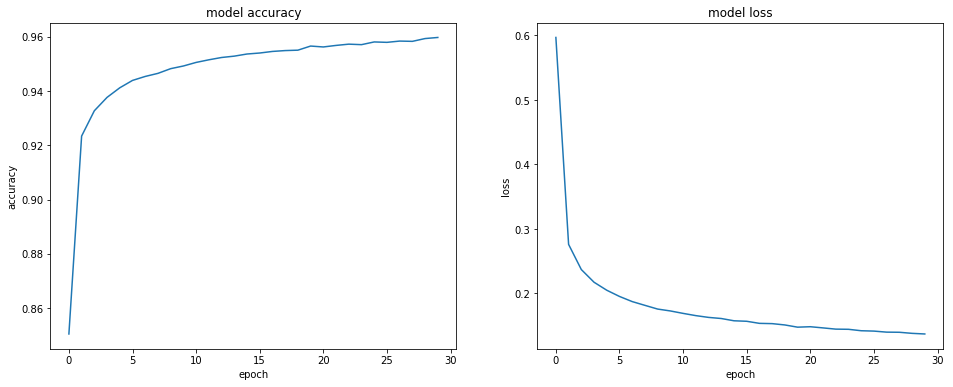

In [34]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

## Arquitetura 2

* Número de neuronios: 
* Número de camadas:
* Utilização de regularização:
* Número de épocas:
* Utilização de batch ou mini-batch:

In [35]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(784,)))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_26 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
Total params: 8,390
Trainable params: 8,390
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

score = model.evaluate(x_test, y_test_oh, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.6241 - acc: 0.8339 - val_loss: 0.3649 - val_acc: 0.8971
Epoch 2/30
60000/60000 [==============================] - 19s 312us/step - loss: 0.3182 - acc: 0.9112 - val_loss: 0.2852 - val_acc: 0.9196
Epoch 3/30
60000/60000 [==============================] - 19s 316us/step - loss: 0.2699 - acc: 0.9229 - val_loss: 0.2610 - val_acc: 0.9230
Epoch 4/30
60000/60000 [==============================] - 19s 317us/step - loss: 0.2442 - acc: 0.9295 - val_loss: 0.2415 - val_acc: 0.9296
Epoch 5/30
60000/60000 [==============================] - 16s 272us/step - loss: 0.2286 - acc: 0.9335 - val_loss: 0.2423 - val_acc: 0.9271
Epoch 6/30
60000/60000 [==============================] - 16s 269us/step - loss: 0.2176 - acc: 0.9373 - val_loss: 0.2364 - val_acc: 0.9314
Epoch 7/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.2087 - acc: 0.9395 - val_loss: 0.

Text(0.5,0,'epoch')

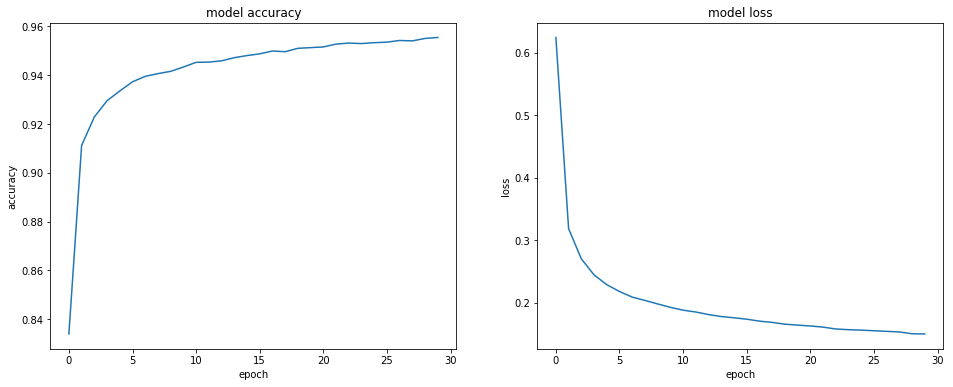

In [37]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

## Arquitetura 3

* Número de neuronios: 
* Número de camadas:
* Utilização de regularização:
* Número de épocas:
* Utilização de batch ou mini-batch:

In [38]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(784,)))
model.add(Dense(units=40, activation='tanh'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_30 (Dense)             (None, 40)                440       
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
Total params: 8,810
Trainable params: 8,810
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

score = model.evaluate(x_test, y_test_oh, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 20s 340us/step - loss: 0.7763 - acc: 0.7504 - val_loss: 0.3807 - val_acc: 0.8890
Epoch 2/30
60000/60000 [==============================] - 20s 330us/step - loss: 0.4251 - acc: 0.8797 - val_loss: 0.3119 - val_acc: 0.9084
Epoch 3/30
60000/60000 [==============================] - 20s 327us/step - loss: 0.3606 - acc: 0.9000 - val_loss: 0.2781 - val_acc: 0.9165
Epoch 4/30
60000/60000 [==============================] - 20s 329us/step - loss: 0.3350 - acc: 0.9077 - val_loss: 0.2655 - val_acc: 0.9249
Epoch 5/30
60000/60000 [==============================] - 20s 334us/step - loss: 0.3201 - acc: 0.9113 - val_loss: 0.2661 - val_acc: 0.9226
Epoch 6/30
60000/60000 [==============================] - 20s 339us/step - loss: 0.3090 - acc: 0.9143 - val_loss: 0.2575 - val_acc: 0.9274
Epoch 7/30
60000/60000 [==============================] - 20s 325us/step - loss: 0.2974 - acc: 0.9177 - val_loss: 0.

Text(0.5,0,'epoch')

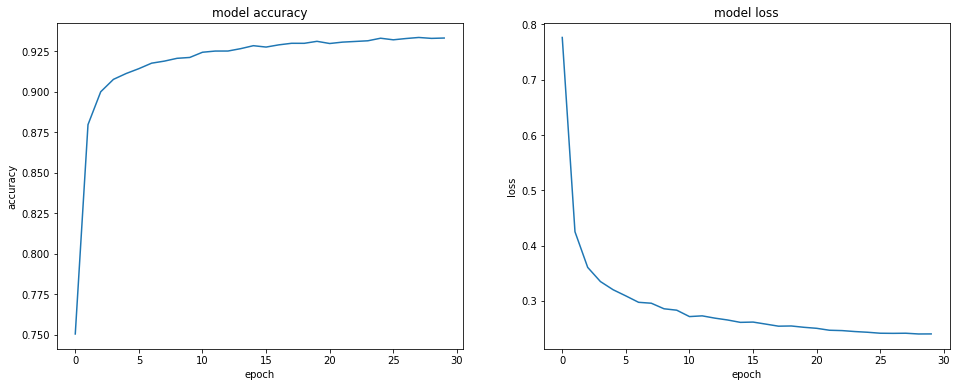

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')